In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings('ignore')
import re


In [2]:
df=pd.read_csv('h1n1_vaccine_prediction.csv')

In [3]:
df.sample(10).style.background_gradient(cmap='rainbow')

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,dr_recc_seasonal_vacc,chronic_medic_condition,cont_child_undr_6_mnths,is_health_worker,has_health_insur,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,sick_from_seas_vacc,age_bracket,qualification,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
1168,1168,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,4.000000,1.000000,4.000000,4.000000,1.000000,1.000000,18 - 34 Years,12 Years,Other or Multiple,Female,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",2.000000,3.000000,0
10733,10733,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,nan,nan,0.000000,0.000000,0.000000,nan,5.000000,1.000000,2.000000,5.000000,1.000000,1.000000,35 - 44 Years,12 Years,Other or Multiple,Female,Below Poverty,Not Married,Rent,Unemployed,"MSA, Not Principle City",0.000000,2.000000,0
622,622,3.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,nan,nan,0.000000,0.000000,1.000000,nan,3.000000,4.000000,4.000000,4.000000,2.000000,2.000000,45 - 54 Years,< 12 Years,Black,Female,Below Poverty,Not Married,Own,Employed,"MSA, Not Principle City",0.000000,2.000000,0
24255,24255,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,nan,3.000000,4.000000,3.000000,2.000000,5.000000,1.000000,45 - 54 Years,< 12 Years,Hispanic,Male,"<= $75,000, Above Poverty",Married,Own,Employed,Non-MSA,1.000000,2.000000,0
9726,9726,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,5.000000,2.000000,1.000000,4.000000,2.000000,1.000000,35 - 44 Years,Some College,White,Female,"> $75,000",Married,Own,Not in Labor Force,"MSA, Not Principle City",1.000000,1.000000,0
8536,8536,2.000000,2.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,nan,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,Non-MSA,1.000000,0.000000,0
9012,9012,3.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2.000000,2.000000,4.000000,2.000000,4.000000,55 - 64 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,Non-MSA,1.000000,0.000000,0
4555,4555,0.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,3.000000,1.000000,1.000000,4.000000,1.000000,1.000000,55 - 64 Years,Some College,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Principle City",2.000000,0.000000,0
11717,11717,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,nan,5.000000,1.000000,1.000000,5.000000,1.000000,1.000000,18 - 34 Years,College Graduate,White,Male,nan,Not Married,Rent,Unemployed,"MSA, Principle City",0.000000,0.000000,0
8311,8311,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,nan,4.000000,2.000000,4.000000,5.000000,2.000000,2.000000,65+ Years,12 Years,White,Female,nan,Married,Own,Not in Labor Force,"MSA, Principle City",1.000000,0.000000,0


In [4]:
df.dtypes

unique_id                      int64
h1n1_worry                   float64
h1n1_awareness               float64
antiviral_medication         float64
contact_avoidance            float64
bought_face_mask             float64
wash_hands_frequently        float64
avoid_large_gatherings       float64
reduced_outside_home_cont    float64
avoid_touch_face             float64
dr_recc_h1n1_vacc            float64
dr_recc_seasonal_vacc        float64
chronic_medic_condition      float64
cont_child_undr_6_mnths      float64
is_health_worker             float64
has_health_insur             float64
is_h1n1_vacc_effective       float64
is_h1n1_risky                float64
sick_from_h1n1_vacc          float64
is_seas_vacc_effective       float64
is_seas_risky                float64
sick_from_seas_vacc          float64
age_bracket                   object
qualification                 object
race                          object
sex                           object
income_level                  object
m

In [5]:
df.describe(include='all').style.background_gradient(cmap='rainbow')

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,dr_recc_seasonal_vacc,chronic_medic_condition,cont_child_undr_6_mnths,is_health_worker,has_health_insur,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,sick_from_seas_vacc,age_bracket,qualification,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
count,26707.000000,26615.000000,26591.000000,26636.000000,26499.000000,26688.000000,26665.000000,26620.000000,26625.000000,26579.000000,24547.000000,24547.000000,25736.000000,25887.000000,25903.000000,14433.000000,26316.000000,26319.000000,26312.000000,26245.000000,26193.000000,26170.000000,26707,25300,26707,26707,22284,25299,24665,25244,26707,26458.000000,26458.000000,26707.000000
unique,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,5,4,4,2,3,2,2,3,3,nan,nan,nan
top,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,65+ Years,College Graduate,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",nan,nan,nan
freq,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,6843,10097,21222,15858,12777,13555,18736,13560,11645,nan,nan,nan
mean,13353.000000,1.618486,1.262532,0.048844,0.725612,0.068982,0.825614,0.358640,0.337315,0.677264,0.220312,0.329735,0.283261,0.082590,0.111918,0.879720,3.850623,2.342566,2.357670,4.025986,2.719162,2.118112,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.886499,0.534583,0.212454
std,7709.791156,0.910311,0.618149,0.215545,0.446214,0.253429,0.379448,0.479610,0.472802,0.467531,0.414466,0.470126,0.450591,0.275266,0.315271,0.325300,1.007436,1.285539,1.362766,1.086565,1.385055,1.332950,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.753422,0.928173,0.409052
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.000000,0.000000,0.000000
25%,6676.500000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,1.000000,1.000000,4.000000,2.000000,1.000000,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.000000,0.000000,0.000000
50%,13353.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,4.000000,2.000000,2.000000,4.000000,2.000000,2.000000,nan,nan,nan,nan,nan,nan,nan,nan,nan,1.000000,0.000000,0.000000
75%,20029.500000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,5.000000,4.000000,4.000000,5.000000,4.000000,4.000000,nan,nan,nan,nan,nan,nan,nan,nan,nan,1.000000,1.000000,0.000000


In [6]:
df.duplicated().sum()

0

##### The data does not contain any duplicate value

In [7]:
df.isnull().sum()

unique_id                        0
h1n1_worry                      92
h1n1_awareness                 116
antiviral_medication            71
contact_avoidance              208
bought_face_mask                19
wash_hands_frequently           42
avoid_large_gatherings          87
reduced_outside_home_cont       82
avoid_touch_face               128
dr_recc_h1n1_vacc             2160
dr_recc_seasonal_vacc         2160
chronic_medic_condition        971
cont_child_undr_6_mnths        820
is_health_worker               804
has_health_insur             12274
is_h1n1_vacc_effective         391
is_h1n1_risky                  388
sick_from_h1n1_vacc            395
is_seas_vacc_effective         462
is_seas_risky                  514
sick_from_seas_vacc            537
age_bracket                      0
qualification                 1407
race                             0
sex                              0
income_level                  4423
marital_status                1408
housing_status      

In [8]:
df.shape

(26707, 34)

In [9]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   unique_id                  26707 non-null  int64  
 1   h1n1_worry                 26615 non-null  float64
 2   h1n1_awareness             26591 non-null  float64
 3   antiviral_medication       26636 non-null  float64
 4   contact_avoidance          26499 non-null  float64
 5   bought_face_mask           26688 non-null  float64
 6   wash_hands_frequently      26665 non-null  float64
 7   avoid_large_gatherings     26620 non-null  float64
 8   reduced_outside_home_cont  26625 non-null  float64
 9   avoid_touch_face           26579 non-null  float64
 10  dr_recc_h1n1_vacc          24547 non-null  float64
 11  dr_recc_seasonal_vacc      24547 non-null  float64
 12  chronic_medic_condition    25736 non-null  float64
 13  cont_child_undr_6_mnths    25887 non-null  flo

In [10]:

def convert_age(age):
    age = age.strip()  # Remove leading and trailing spaces
    match = re.search(r'\d+', age)  # Extract numeric part using regular expression
    return int(match.group()) if match else None

In [11]:
df['age_bracket'] = df['age_bracket'].apply(convert_age)

In [12]:
def convert(age):
    # Handle the case where 'age' is already an integer
    if isinstance(age, int):
        return age

    age = age.strip()  # Remove leading and trailing spaces

    # Handle special cases such as '< 12 Years'
    if age.startswith('<'):
        return 6  # Assuming an approximate midpoint for "< 12 Years"

    match = re.search(r'\d+', age)  # Extract numeric part using regular expression
    return int(match.group()) if match else None  # Convert to int if numeric part exists, otherwise return None

In [13]:
df['age_bracket'] = df['age_bracket'].apply(convert)

In [14]:
def fill_null(column):
    if pd.api.types.is_numeric_dtype(column):
        return column.fillna(column.mean())
    else:
        return column.fillna("no category")

In [15]:
df_filled = df.apply(fill_null)

In [16]:
df_filled.isnull().sum()

unique_id                    0
h1n1_worry                   0
h1n1_awareness               0
antiviral_medication         0
contact_avoidance            0
bought_face_mask             0
wash_hands_frequently        0
avoid_large_gatherings       0
reduced_outside_home_cont    0
avoid_touch_face             0
dr_recc_h1n1_vacc            0
dr_recc_seasonal_vacc        0
chronic_medic_condition      0
cont_child_undr_6_mnths      0
is_health_worker             0
has_health_insur             0
is_h1n1_vacc_effective       0
is_h1n1_risky                0
sick_from_h1n1_vacc          0
is_seas_vacc_effective       0
is_seas_risky                0
sick_from_seas_vacc          0
age_bracket                  0
qualification                0
race                         0
sex                          0
income_level                 0
marital_status               0
housing_status               0
employment                   0
census_msa                   0
no_of_adults                 0
no_of_ch

In [17]:
df.dtypes

unique_id                      int64
h1n1_worry                   float64
h1n1_awareness               float64
antiviral_medication         float64
contact_avoidance            float64
bought_face_mask             float64
wash_hands_frequently        float64
avoid_large_gatherings       float64
reduced_outside_home_cont    float64
avoid_touch_face             float64
dr_recc_h1n1_vacc            float64
dr_recc_seasonal_vacc        float64
chronic_medic_condition      float64
cont_child_undr_6_mnths      float64
is_health_worker             float64
has_health_insur             float64
is_h1n1_vacc_effective       float64
is_h1n1_risky                float64
sick_from_h1n1_vacc          float64
is_seas_vacc_effective       float64
is_seas_risky                float64
sick_from_seas_vacc          float64
age_bracket                    int64
qualification                 object
race                          object
sex                           object
income_level                  object
m

In [18]:
from sklearn.preprocessing import LabelEncoder

In [19]:
enc = LabelEncoder()

In [20]:

df_filled.qualification = enc.fit_transform(df_filled.qualification)
df_filled.race = enc.fit_transform(df_filled.race )
df_filled.sex = enc.fit_transform(df_filled.sex)
df_filled.income_level = enc.fit_transform(df_filled.income_level)
df_filled.marital_status = enc.fit_transform(df_filled.marital_status)
df_filled.housing_status = enc.fit_transform(df_filled.housing_status)
df_filled.employment = enc.fit_transform(df_filled.employment)
df_filled.census_msa = enc.fit_transform(df_filled.census_msa)


In [21]:
df_filled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   unique_id                  26707 non-null  int64  
 1   h1n1_worry                 26707 non-null  float64
 2   h1n1_awareness             26707 non-null  float64
 3   antiviral_medication       26707 non-null  float64
 4   contact_avoidance          26707 non-null  float64
 5   bought_face_mask           26707 non-null  float64
 6   wash_hands_frequently      26707 non-null  float64
 7   avoid_large_gatherings     26707 non-null  float64
 8   reduced_outside_home_cont  26707 non-null  float64
 9   avoid_touch_face           26707 non-null  float64
 10  dr_recc_h1n1_vacc          26707 non-null  float64
 11  dr_recc_seasonal_vacc      26707 non-null  float64
 12  chronic_medic_condition    26707 non-null  float64
 13  cont_child_undr_6_mnths    26707 non-null  flo

In [22]:
df_filled.describe().style.background_gradient(cmap='coolwarm')

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,dr_recc_seasonal_vacc,chronic_medic_condition,cont_child_undr_6_mnths,is_health_worker,has_health_insur,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,sick_from_seas_vacc,age_bracket,qualification,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
count,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000
mean,13353.000000,1.618486,1.262532,0.048844,0.725612,0.068982,0.825614,0.358640,0.337315,0.677264,0.220312,0.329735,0.283261,0.082590,0.111918,0.879720,3.850623,2.342566,2.357670,4.025986,2.719162,2.118112,45.494440,1.846482,2.570300,0.406223,0.953795,0.545175,0.374920,0.656232,0.833489,0.886499,0.534583,0.212454
std,7709.791156,0.908741,0.616805,0.215258,0.444473,0.253339,0.379150,0.478828,0.472076,0.466410,0.397351,0.450713,0.442323,0.271007,0.310489,0.239135,1.000034,1.276167,1.352650,1.077125,1.371662,1.319480,16.728530,1.186442,0.923226,0.491136,1.113444,0.594485,0.622325,0.814312,0.823313,0.749901,0.923836,0.409052
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6676.500000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.879720,3.000000,1.000000,1.000000,4.000000,2.000000,1.000000,35.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,13353.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.879720,4.000000,2.000000,2.000000,4.000000,2.000000,2.000000,45.000000,2.000000,3.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
75%,20029.500000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.220312,1.000000,1.000000,0.000000,0.000000,1.000000,5.000000,4.000000,4.000000,5.000000,4.000000,2.118112,65.000000,3.000000,3.000000,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,0.000000
max,26706.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,65.000000,4.000000,3.000000,1.000000,3.000000,2.000000,2.000000,3.000000,2.000000,3.000000,3.000000,1.000000


<Axes: ylabel='age_bracket'>

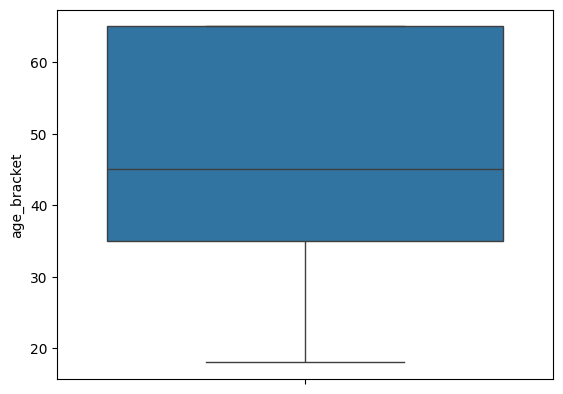

In [23]:
sns.boxplot(df_filled.age_bracket)

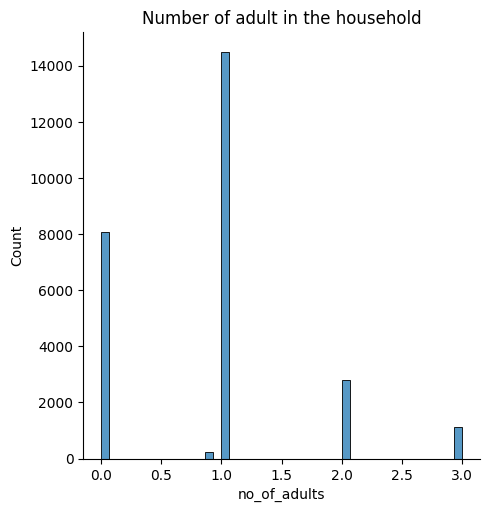

In [24]:
sns.displot(df_filled.no_of_adults)
plt.title('Number of adult in the household')
plt.show()

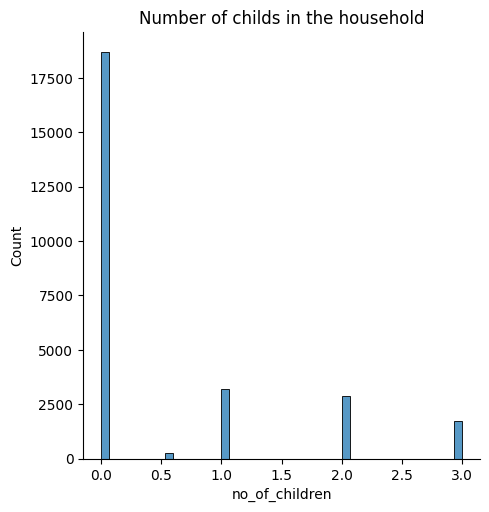

In [25]:
sns.displot(df_filled.no_of_children)
plt.title('Number of childs in the household')
plt.show()

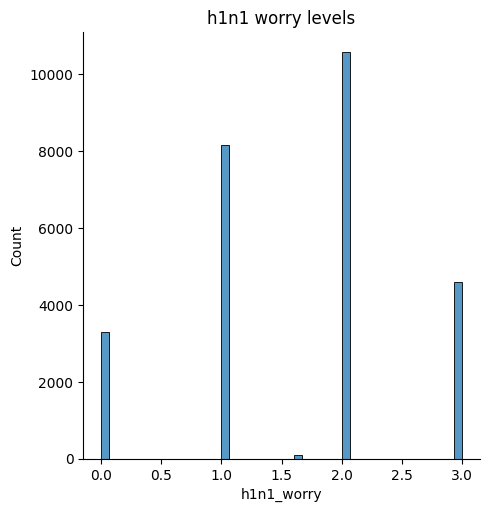

In [26]:
sns.displot(df_filled.h1n1_worry)
plt.title('h1n1 worry levels')
plt.show()

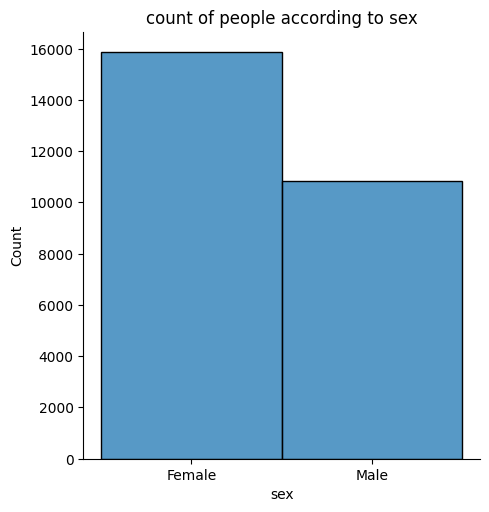

In [27]:
sns.displot(df.sex)
plt.title('count of people according to sex')
plt.show()

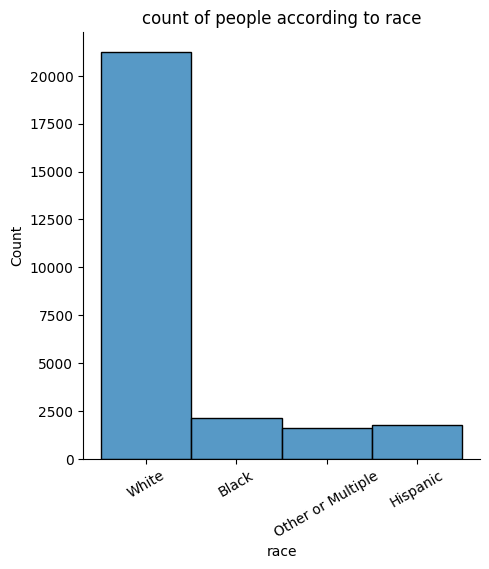

In [28]:
sns.displot(df.race)
plt.title('count of people according to race')
plt.xticks(rotation=30)
plt.show()

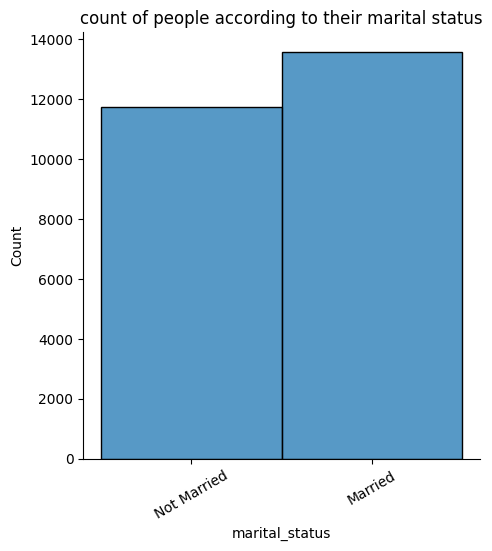

In [29]:
sns.displot(df.marital_status)
plt.title('count of people according to their marital status')
plt.xticks(rotation=30)
plt.show()

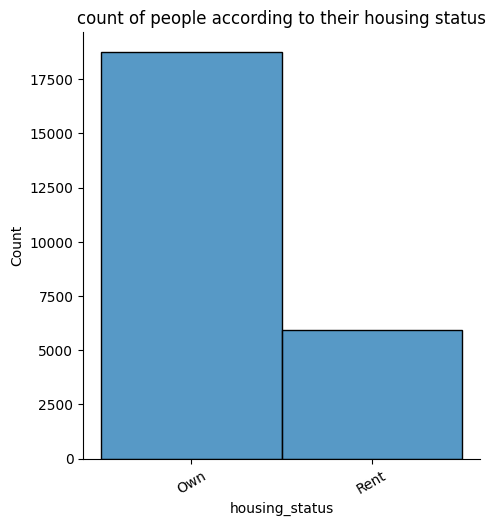

In [30]:
sns.displot(df.housing_status)
plt.title('count of people according to their housing status')
plt.xticks(rotation=30)
plt.show()

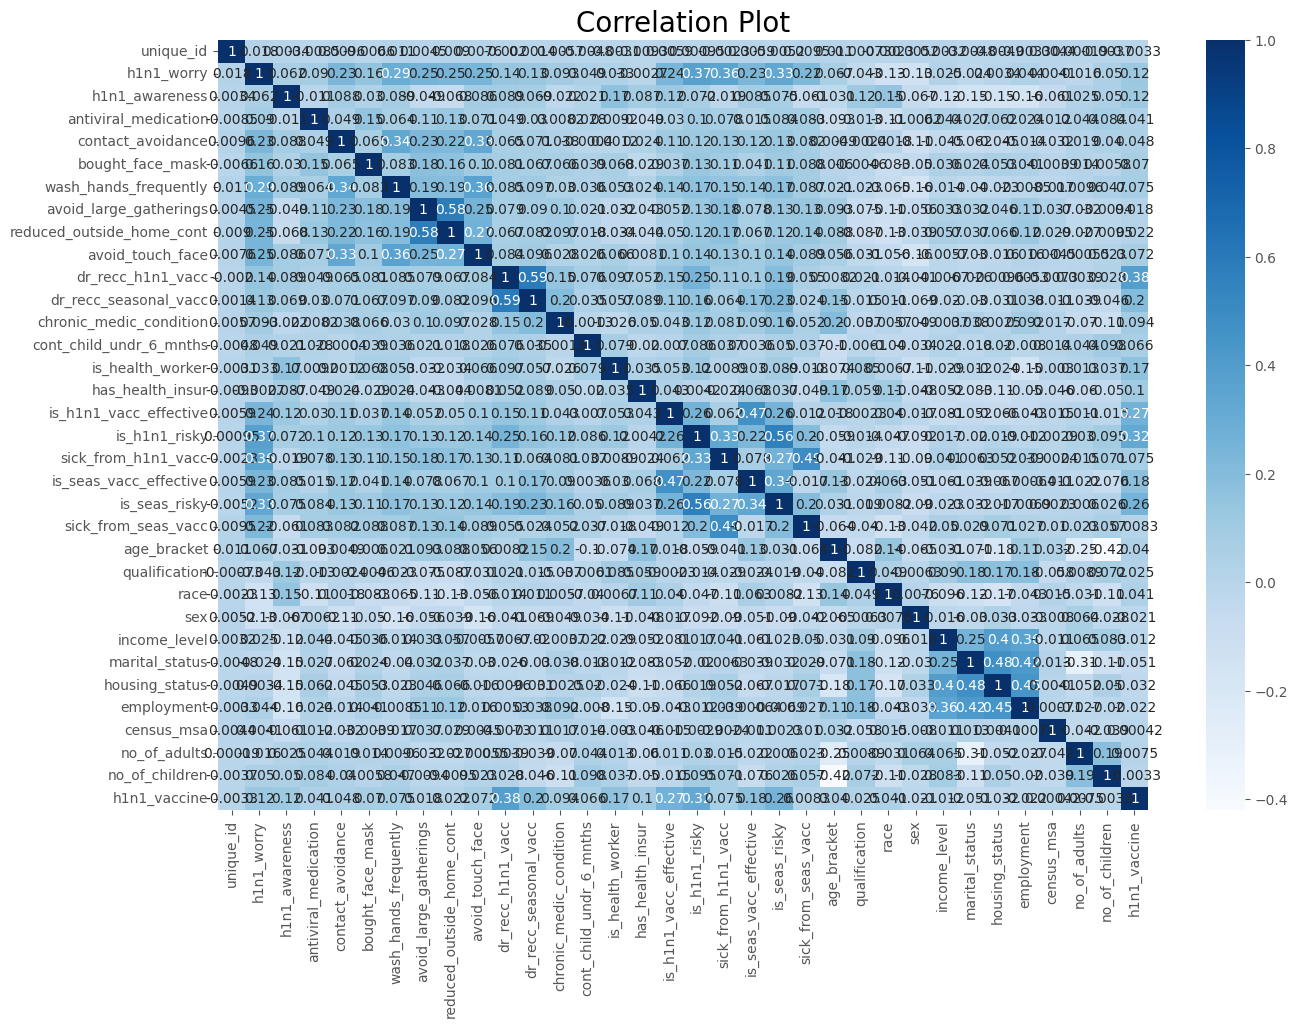

In [31]:
plt.rcParams['figure.figsize'] = (15, 10)
plt.style.use('ggplot')

sns.heatmap(df_filled.corr(), annot=True, cmap='Blues')
plt.title('Correlation Plot', fontsize = 20)
plt.show()

In [32]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split


In [33]:
y=df_filled.h1n1_vaccine
x=x=df_filled.drop(['h1n1_vaccine'],axis=1)

In [34]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=23)

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC

### Logictic Regression

In [36]:
lr=LogisticRegression()


In [37]:
lr.fit(x_train,y_train)

LogisticRegression()

In [38]:
lr.score(x_train,y_train)

0.809885524767305

In [39]:
lr.score(x_test,y_test)

0.8080618994134532

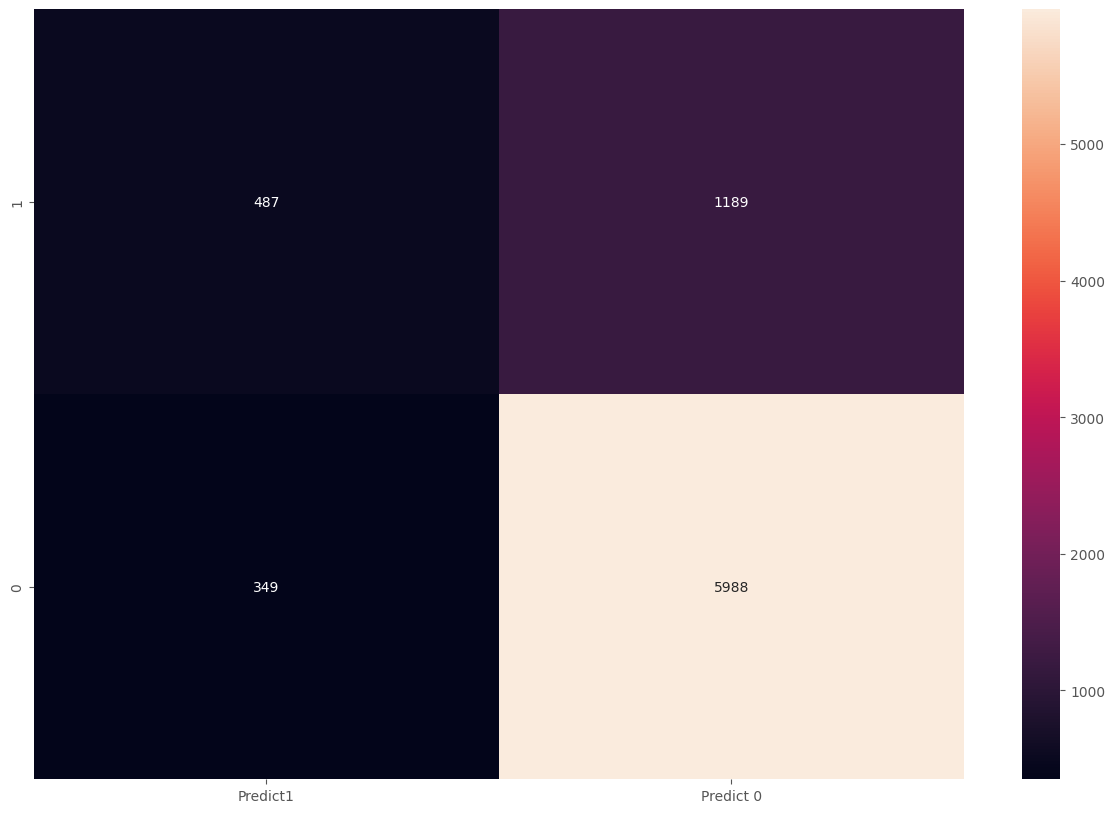

In [40]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
predictions=lr.predict(x_test)
cm=metrics.confusion_matrix(y_test,predictions, labels=[1,0])
df_cm=pd.DataFrame(cm,index=[i for i in ["1","0"]],
                   columns=[i for i in ["Predict1","Predict 0"]])
sns.heatmap(df_cm,annot=True,fmt='g')
lrp = accuracy_score(y_test,predictions)

### Decision Tree Classifier

In [41]:
dtc=DecisionTreeClassifier(criterion='entropy',min_samples_split=50)

In [42]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', min_samples_split=50)

In [43]:
dtc.score(x_train,y_train)

0.8778217609928319

In [44]:
dtc.score(x_test,y_test)

0.8333957319356047

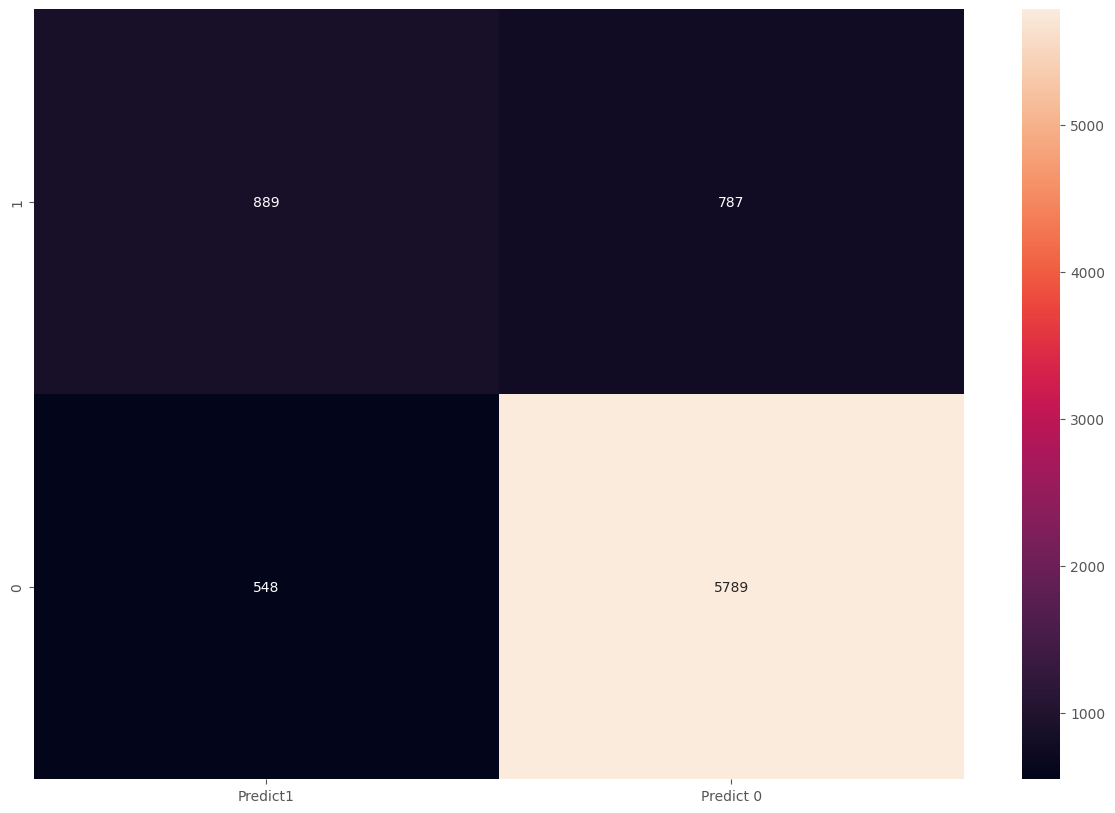

In [45]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
predictions=dtc.predict(x_test)
cm=metrics.confusion_matrix(y_test,predictions, labels=[1,0])
df_cm=pd.DataFrame(cm,index=[i for i in ["1","0"]],
                   columns=[i for i in ["Predict1","Predict 0"]])
sns.heatmap(df_cm,annot=True,fmt='g')
dtcp = accuracy_score(y_test,predictions)

### Random foresr classifier

In [46]:
rfc=RandomForestClassifier(n_estimators=15,max_features=0.3, min_samples_split=40)

In [47]:
rfc.fit(x_train,y_train)

RandomForestClassifier(max_features=0.3, min_samples_split=40, n_estimators=15)

In [48]:
rfc.score(x_train,y_train)

0.8758960094147855

In [49]:
rfc.score(x_test,y_test)

0.859103956071384

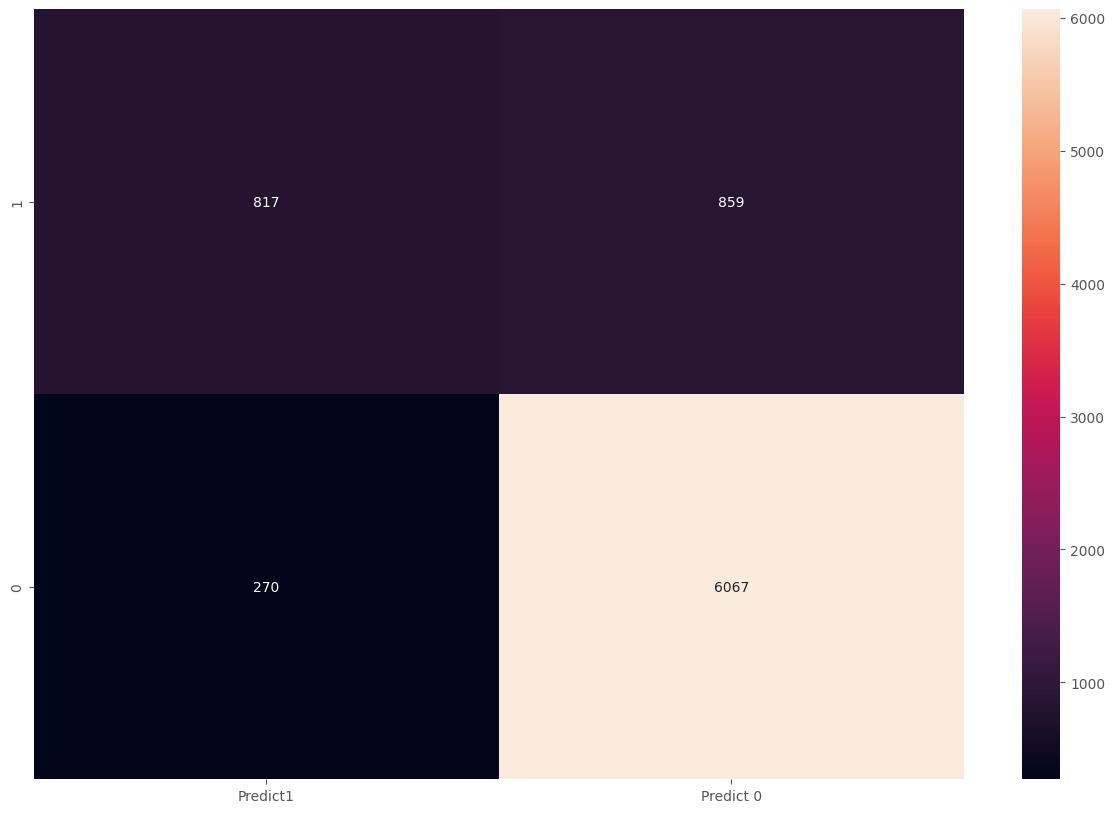

In [50]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
predictions=rfc.predict(x_test)
cm=metrics.confusion_matrix(y_test,predictions, labels=[1,0])
df_cm=pd.DataFrame(cm,index=[i for i in ["1","0"]],
                   columns=[i for i in ["Predict1","Predict 0"]])
sns.heatmap(df_cm,annot=True,fmt='g')
rfcp = accuracy_score(y_test,predictions)

### KNeighbors Classifier

In [51]:
knc=KNeighborsClassifier()

In [52]:
knc.fit(x_train,y_train)

KNeighborsClassifier()

In [53]:
knc.score(x_train,y_train)

0.8087086765807211

In [54]:
knc.score(x_test,y_test)

0.7522775489829028

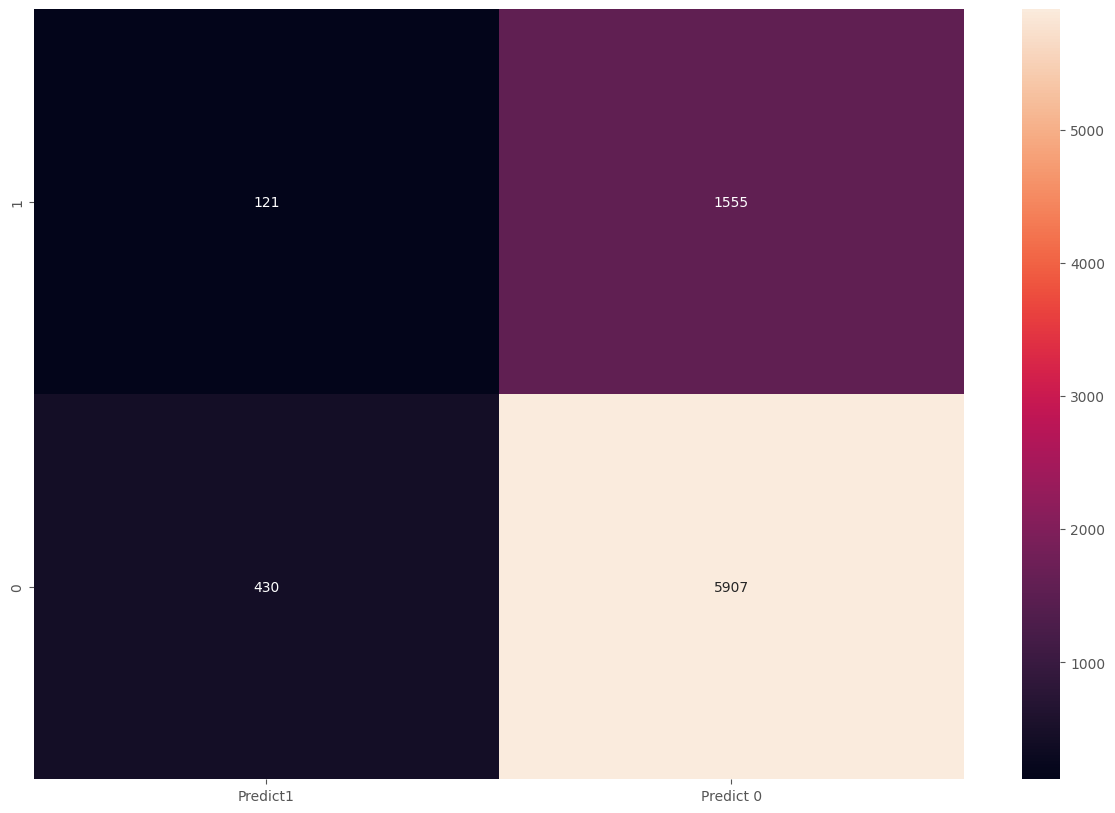

In [55]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
predictions=knc.predict(x_test)
cm=metrics.confusion_matrix(y_test,predictions, labels=[1,0])
df_cm=pd.DataFrame(cm,index=[i for i in ["1","0"]],
                   columns=[i for i in ["Predict1","Predict 0"]])
sns.heatmap(df_cm,annot=True,fmt='g')
kncp= accuracy_score(y_test,predictions)

### Gradient Boosting Classifier

In [56]:
gbc=GradientBoostingClassifier(learning_rate=0.99,n_estimators=50)

In [57]:
gbc.fit(x_train,y_train)

GradientBoostingClassifier(learning_rate=0.99, n_estimators=50)

In [58]:
gbc.score(x_train,y_train)

0.8723654648550337

In [59]:
gbc.score(x_test,y_test)

0.8452514663671534

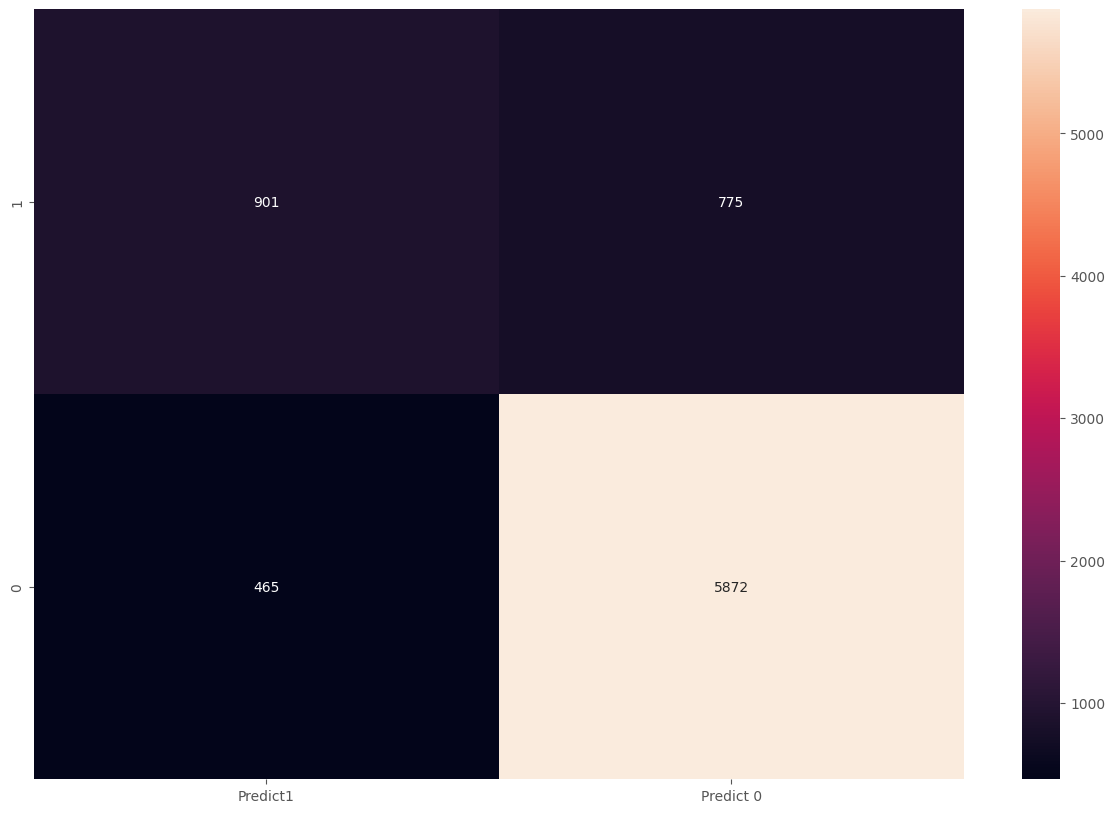

In [60]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
predictions=gbc.predict(x_test)
cm=metrics.confusion_matrix(y_test,predictions, labels=[1,0])
df_cm=pd.DataFrame(cm,index=[i for i in ["1","0"]],
                   columns=[i for i in ["Predict1","Predict 0"]])
sns.heatmap(df_cm,annot=True,fmt='g')
gbcp = accuracy_score(y_test,predictions)

### Bagging Classifier

In [61]:
bc=BaggingClassifier(max_samples=0.15, n_estimators=20)

In [62]:
bc.fit(x_train,y_train)

BaggingClassifier(max_samples=0.15, n_estimators=20)

In [63]:
bc.score(x_train,y_train)

0.8788916229806355

In [64]:
bc.score(x_test,y_test)

0.8484961936852614

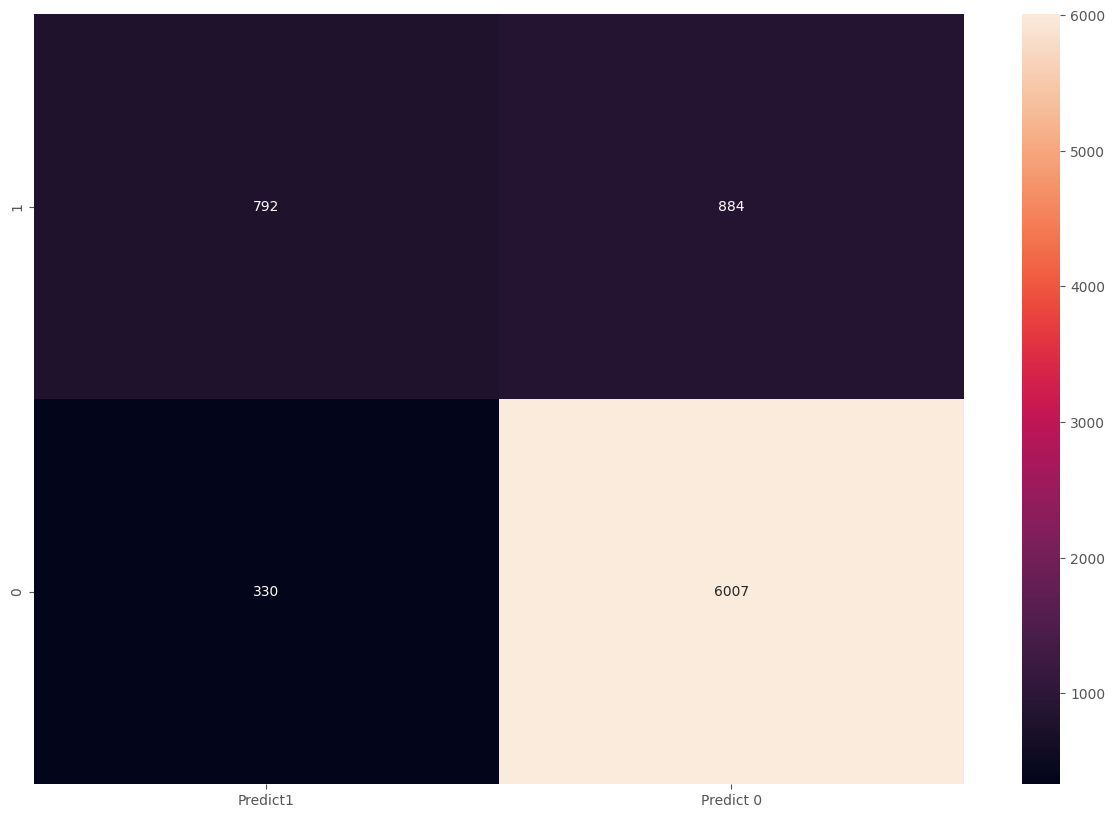

In [65]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
predictions=bc.predict(x_test)
cm=metrics.confusion_matrix(y_test,predictions, labels=[1,0])
df_cm=pd.DataFrame(cm,index=[i for i in ["1","0"]],
                   columns=[i for i in ["Predict1","Predict 0"]])
sns.heatmap(df_cm,annot=True,fmt='g')
bcp = accuracy_score(y_test,predictions)

### AdaBoost Classifier

In [66]:
adc=AdaBoostClassifier(learning_rate=0.0000001, n_estimators=50)

In [67]:
adc.fit(x_train,y_train)

AdaBoostClassifier(learning_rate=1e-07)

In [68]:
adc.score(x_train,y_train)

0.8001497806782925

In [69]:
adc.score(x_test,y_test)

0.8018220391863222

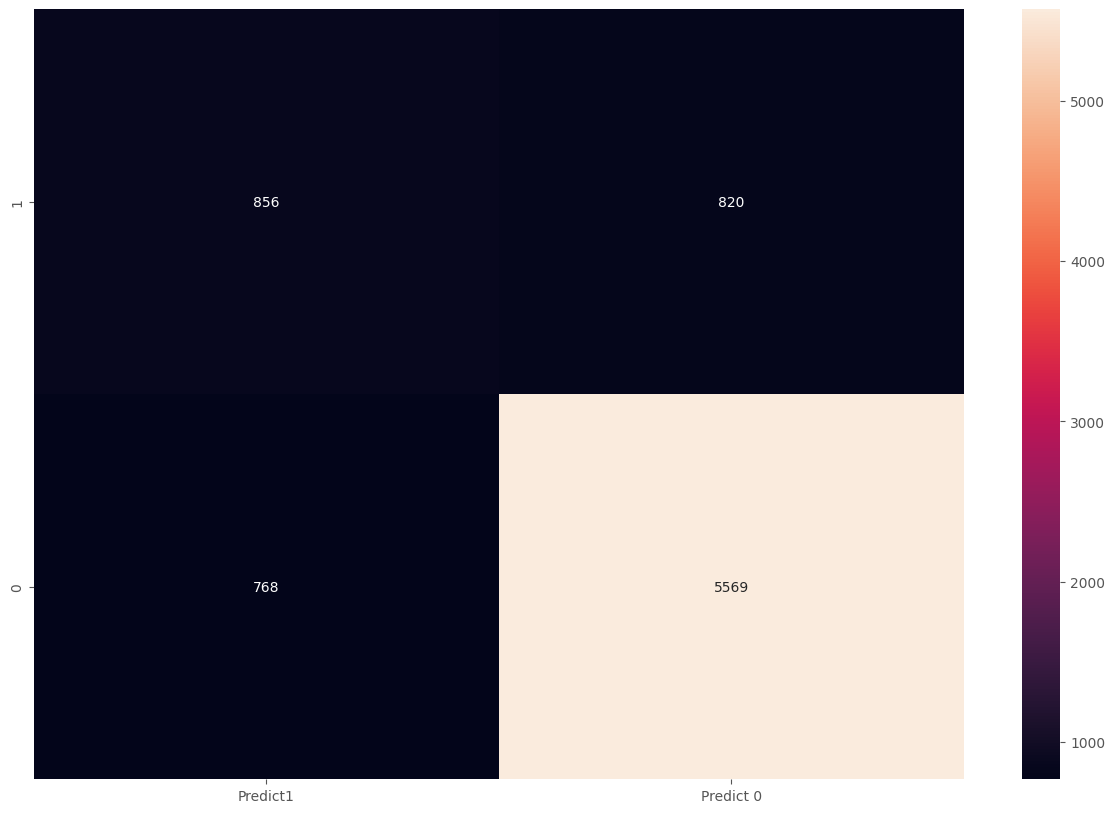

In [70]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
predictions=adc.predict(x_test)
cm=metrics.confusion_matrix(y_test,predictions, labels=[1,0])
df_cm=pd.DataFrame(cm,index=[i for i in ["1","0"]],
                   columns=[i for i in ["Predict1","Predict 0"]])
sns.heatmap(df_cm,annot=True,fmt='g')
adcp = accuracy_score(y_test,predictions)

### SVC

In [71]:
svc=SVC(C=0.5)

In [72]:
svc.fit(x_train,y_train)

SVC(C=0.5)

In [73]:
svc.score(x_train,y_train)


0.7861345886380657

In [74]:
svc.score(x_test,y_test)

0.7908398851865718

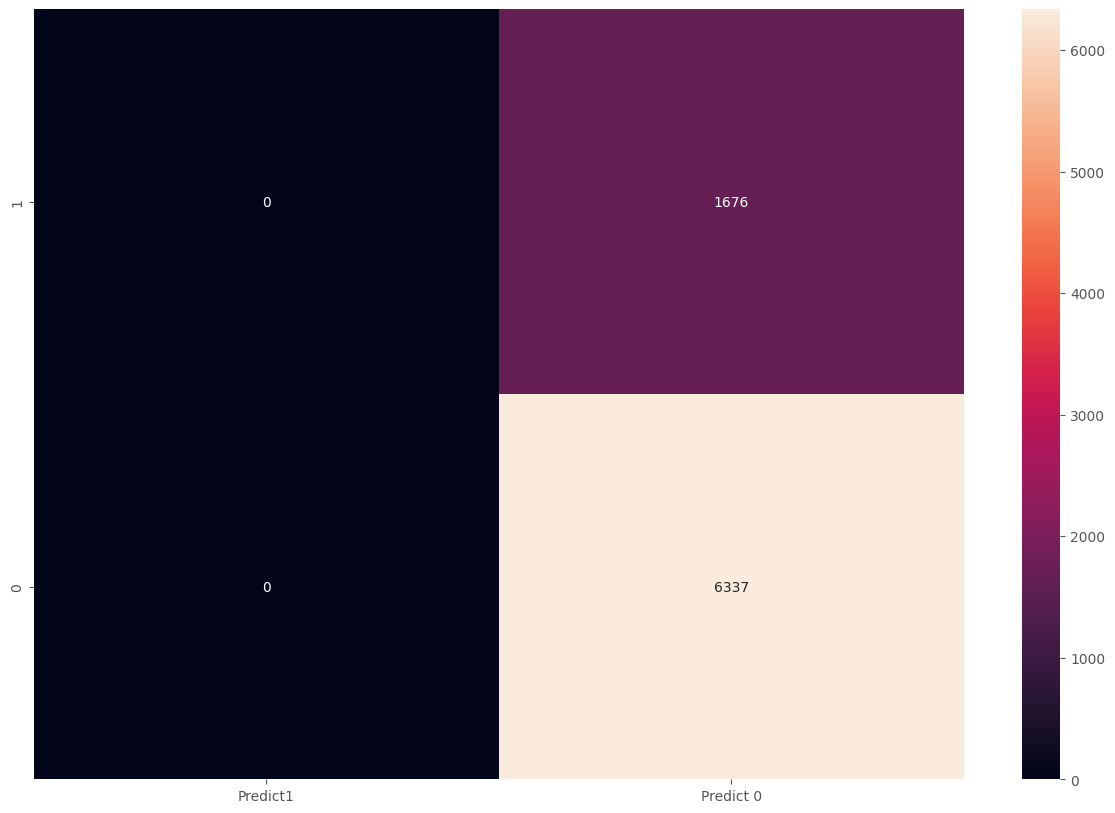

In [75]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
predictions=svc.predict(x_test)
cm=metrics.confusion_matrix(y_test,predictions, labels=[1,0])
df_cm=pd.DataFrame(cm,index=[i for i in ["1","0"]],
                   columns=[i for i in ["Predict1","Predict 0"]])
sns.heatmap(df_cm,annot=True,fmt='g')
svcp = accuracy_score(y_test,predictions)

In [76]:
Accuracy_Score = [dtcp,lrp,kncp,rfcp,adcp,svcp,bcp,gbcp]
Models = [ 'Decision Tree' , 'Logistic Regression', 'Kneighbour',
           'Random Forest','Ada boost','SVC','Bagging Classifier','Gradient boosting',]

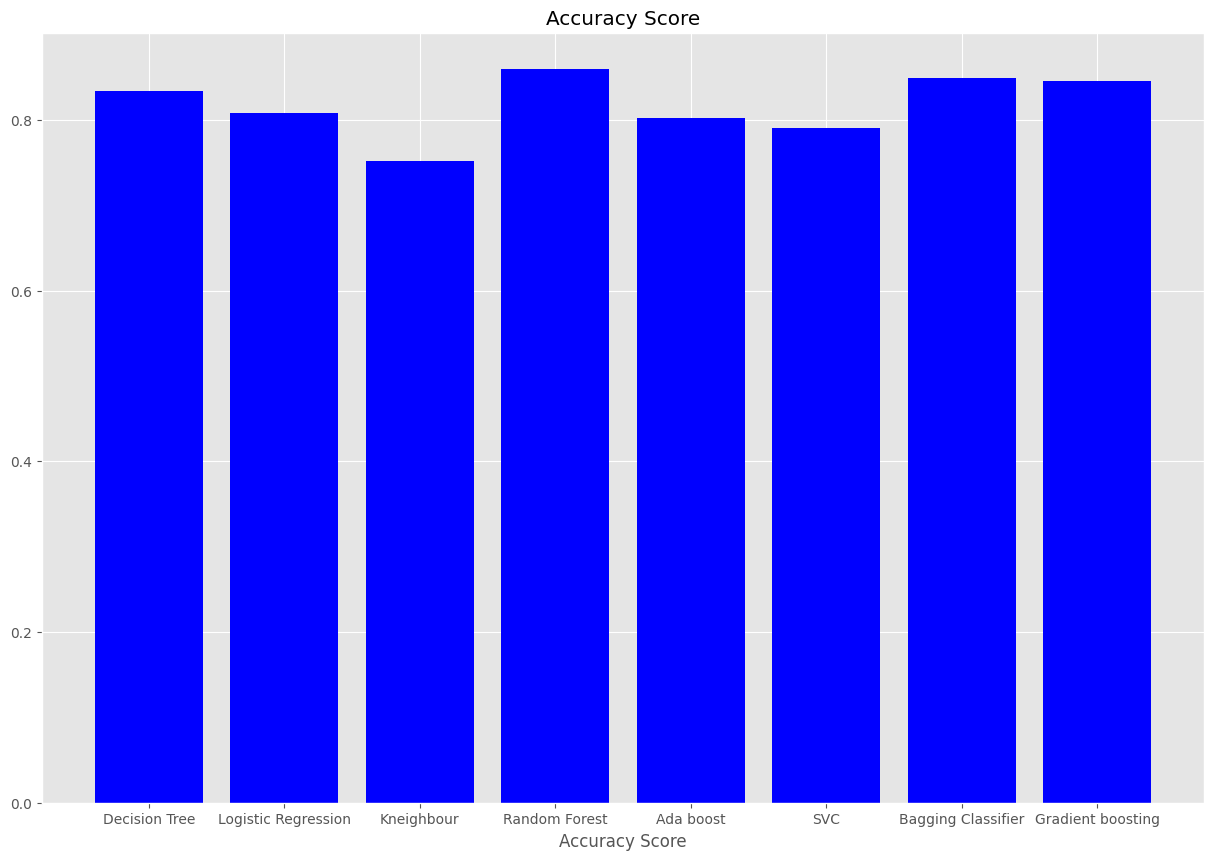

In [77]:
plt.bar(x=Models, height=Accuracy_Score, color='blue') 
plt.xlabel('Accuracy Score')
plt.title('Accuracy Score')
plt.show()

### Random Forest has highest accurancy